In [2]:
# Mount to Google Drive 

from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [1]:
# Unzip the datasets.zip on my Google Drive

!jar xvf "/content/drive/My Drive/Datasets.zip"

In [0]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
from tqdm import tqdm
import tensorflow as tf
%matplotlib inline

Categories = ["Cabbage", "Carrot", "Chili", "Cucumber", "Ginger", "Long Bean", "Potato", "Pumpkin", "Sprouts", "Tomato"]

DataPath = "/content/Datasets"

In [5]:
datasets = []

for category in Categories:
    path = os.path.join(DataPath, category)
    class_num = Categories.index(category)
        
    for img in tqdm(os.listdir(path)):
        img_array = cv2.imread(os.path.join(path, img))
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        new_array = cv2.resize(img_array, (84, 84))
        datasets.append([new_array, class_num])


from sklearn.model_selection import train_test_split
import random

Train_data, Test_data= train_test_split(datasets, test_size = 0.30, random_state=2)

print("")
print('Train set length: ', len(Train_data))
print('Test set length: ', len(Test_data))

100%|██████████| 600/600 [00:00<00:00, 3675.77it/s]



Train set length:  4200
Test set length:  1800


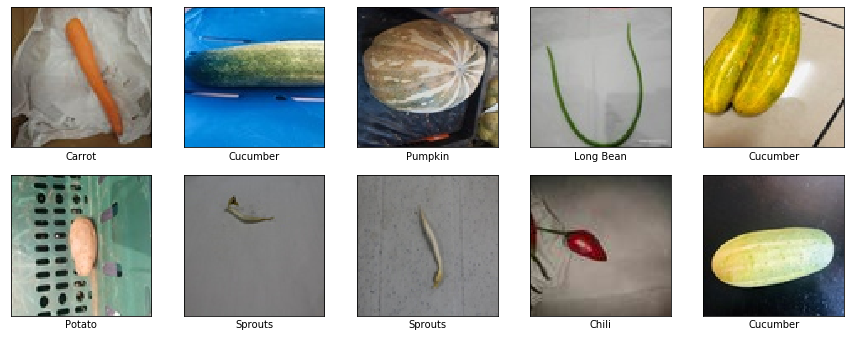

In [6]:
plt.figure(figsize=(15,15))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(Train_data[i][0])
    plt.xlabel(Categories[Train_data[i][1]])
plt.show()

In [7]:
X_train = []
Y_train = []
X_test = []
Y_test = []

for features,label in Train_data:
    X_train.append(features)
    Y_train.append(label)

for features,label in Test_data:
    X_test.append(features)
    Y_test.append(label)

X_train = np.array(X_train)
Y_train = np.array(Y_train)

X_test = np.array(X_test)
Y_test = np.array(Y_test)

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(4200, 84, 84, 3)
(4200,)
(1800, 84, 84, 3)
(1800,)


In [8]:
# Use dimensionality reduction on the data reshaped
X_train = X_train.reshape(len(X_train), 84*84*3)
X_test = X_test.reshape(len(X_test), 84*84*3)

print(X_train.shape)
print(X_test.shape)

(4200, 21168)
(1800, 21168)


In [9]:
# First Method - Logistic Regression #############################
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression()
logmodel.fit(X_train,Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
# Prediction
predictions = logmodel.predict(X_test)

In [11]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

print(classification_report(Y_test, predictions))
print("Accuracy:",round(accuracy_score(Y_test, predictions), 2))

              precision    recall  f1-score   support

           0       0.64      0.66      0.65       192
           1       0.87      0.89      0.88       187
           2       0.86      0.88      0.87       176
           3       0.76      0.72      0.74       174
           4       0.81      0.67      0.73       171
           5       0.87      0.92      0.90       185
           6       0.84      0.88      0.86       174
           7       0.96      0.91      0.94       176
           8       0.97      1.00      0.99       170
           9       0.78      0.80      0.79       195

    accuracy                           0.83      1800
   macro avg       0.84      0.83      0.83      1800
weighted avg       0.83      0.83      0.83      1800

Accuracy: 0.83


Text(0.5, 257.44, 'Predicted label')

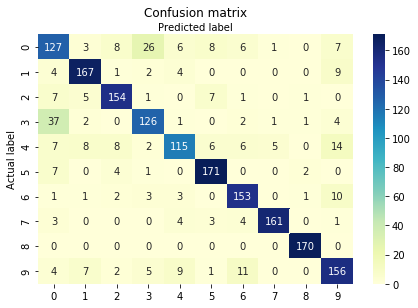

In [12]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(Y_test, predictions)
cnf_matrix

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [13]:
print("Accuracy:", round(metrics.accuracy_score(Y_test, predictions),2))
print("Precision:", round(metrics.precision_score(Y_test, predictions, pos_label='positive', average='micro'),2))
print("Recall:", round(metrics.recall_score(Y_test, predictions, pos_label='positive', average='micro'),2))

Accuracy: 0.83
Precision: 0.83
Recall: 0.83


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


In [14]:
# Second Method - Convolutional Neural Networks #############################

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import pickle

# Create data.pickle
X_train = []
Y_train = []
X_test = []
Y_test = []

for features,label in Train_data:
    X_train.append(features)
    Y_train.append(label)

for features,label in Test_data:
    X_test.append(features)
    Y_test.append(label)

X_train = np.array(X_train)
Y_train = np.array(Y_train)
X_test = np.array(X_test)
Y_test = np.array(Y_test)

# Use dimensionality reduction on the data reshaped
#X_train = X_train.reshape(len(X_train), 84*84*3)

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(4200, 84, 84, 3)
(4200,)
(1800, 84, 84, 3)
(1800,)


In [0]:
# WB indicates that the file is opened for writing in binary mode.

#Train Data
pickle.dump(X_train, open("X_train.pickle","wb"))
pickle.dump(Y_train, open("Y_train.pickle","wb"))

#Test Data
pickle.dump(X_test, open("X_test.pickle","wb"))
pickle.dump(Y_test, open("Y_test.pickle","wb"))

In [16]:
# RB opens the file in binary format for reading

#Train Data
X_train = pickle.load(open("X_train.pickle","rb"))
Y_train = pickle.load(open("Y_train.pickle","rb"))

#Test Data
X_test = pickle.load(open("X_test.pickle","rb"))
Y_test = pickle.load(open("Y_test.pickle","rb"))

X_train = X_train / 255.0
X_test = X_test / 255.0

from keras.utils import to_categorical
Y_train_binary = to_categorical(Y_train) # one hot encoding
Y_test_binary = to_categorical(Y_test) # one hot encoding

Using TensorFlow backend.


In [17]:
# Convolutional Neural Networks for dataset
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(128))
model.add(Dropout(0.5,seed=1))
model.add(Activation('relu'))

model.add(Dense(64))
model.add(Dropout(0.5,seed=1))
model.add(Activation('relu'))

model.add(Dense(32))
model.add(Dropout(0.1,seed=1))
model.add(Activation('relu'))

model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


model.fit(X_train, Y_train_binary, batch_size=32, epochs=20, validation_split=0.3)

# Evaluate
print("")
print("Evaluation ")
model.evaluate(X_test, Y_test_binary)

Train on 2940 samples, validate on 1260 samples
Epoch 1/20
2940/2940 [==============================] - 7s 3ms/sample - loss: 2.3036 - accuracy: 0.1095 - val_loss: 2.2838 - val_accuracy: 0.0944
Epoch 2/20
2940/2940 [==============================] - 1s 350us/sample - loss: 2.1117 - accuracy: 0.2044 - val_loss: 1.8078 - val_accuracy: 0.4008
Epoch 3/20
2940/2940 [==============================] - 1s 346us/sample - loss: 1.7078 - accuracy: 0.3806 - val_loss: 1.3424 - val_accuracy: 0.4881
Epoch 4/20
2940/2940 [==============================] - 1s 342us/sample - loss: 1.3667 - accuracy: 0.5442 - val_loss: 1.0190 - val_accuracy: 0.6992
Epoch 5/20
2940/2940 [==============================] - 1s 380us/sample - loss: 1.1536 - accuracy: 0.6122 - val_loss: 0.7053 - val_accuracy: 0.7722
Epoch 6/20
2940/2940 [==============================] - 1s 352us/sample - loss: 0.8580 - accuracy: 0.7014 - val_loss: 0.5370 - val_accuracy: 0.8159
Epoch 7/20
2940/2940 [==============================] - 1s 342us/s

[0.17185209919595057, 0.9583333]

In [0]:
Y_pred = model.predict_classes(X_test)

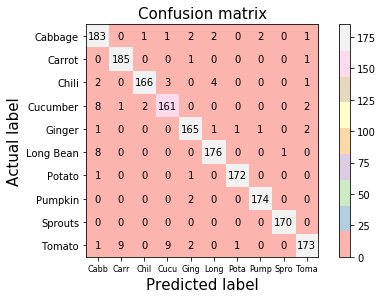

In [22]:
cm = metrics.confusion_matrix(Y_test, Y_pred)
plt.imshow(cm, interpolation="nearest", cmap="Pastel1")
plt.title('Confusion matrix', size = 15)
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, ["Cabb", "Carr", "Chil", "Cucu", "Ging", "Long", "Pota", "Pump", "Spro", "Toma"], size=8)
plt.yticks(tick_marks, ["Cabbage", "Carrot", "Chili", "Cucumber", "Ginger", "Long Bean", "Potato", "Pumpkin", "Sprouts", "Tomato"], size=10)
plt.tight_layout()
plt.ylabel('Actual label', size = 15)
plt.xlabel('Predicted label', size = 15)
width, height = cm.shape

for x in range(width):
  for y in range(height):
    plt.annotate(str(cm[x][y]), xy=(y, x),
                 horizontalalignment='center',
                 verticalalignment='center')

plt.show()